In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.utils import to_categorical

In [ ]:
fashion_train_df = pd.read_csv('data/fashion_minst/fashion-mnist_train.csv', sep=',')
fashion_test_df = pd.read_csv('data/fashion_minst/fashion-mnist_test.csv', sep=',')

In [ ]:
fashion_train_df.shape   # Shape of the dataset

In [ ]:
fashion_train_df.columns   # Name of the columns of the DataSet.

In [ ]:
print(set(fashion_train_df['label']))

So we have 10 different lables. from 0 to 9. 

Now lets find out what is the min and max of values of in the other columns.

In [ ]:
print([fashion_train_df.drop(labels='label', axis=1).min(axis=1).min(), 
      fashion_train_df.drop(labels='label', axis=1).max(axis=1).max()])

So we have 0 to 255 which is the color values for grayscale. 0 being white and 255 being black.

Now lets check some of the rows in tabular format

In [ ]:
fashion_train_df.head()

So evry other things of the test dataset are going to be the same as the train dataset except the shape.

In [ ]:
fashion_test_df.shape

So here we have 10000 images instead of 60000 as in the train dataset.

Lets check first few rows.

In [ ]:
fashion_test_df.head()

In [ ]:
training = np.asarray(fashion_train_df, dtype='float32')

height = 10
width = 10

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(17,17))
axes = axes.ravel()  # this flattens the 15x15 matrix into 225
n_train = len(training)

for i in range(0, height*width):
    index = np.random.randint(0, n_train)
    axes[i].imshow(training[index, 1:].reshape(28,28))
    axes[i].set_title(int(training[index, 0]), fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.5)

In [ ]:
training = np.asarray(fashion_train_df, dtype='float32')
X_train = training[:, 1:].reshape([-1,28,28,1])
X_train = X_train/255   
y_train = training[:, 0]

testing = np.asarray(fashion_test_df, dtype='float32')
X_test = testing[:, 1:].reshape([-1,28,28,1])
X_test = X_test/255    
y_test = testing[:, 0]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=5)    # TODO : change the random state to 5

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(rate=0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=32, activation='relu'))
cnn_model.add(Dense(units=10, activation='sigmoid'))

**compile the model**

In [ ]:
cnn_model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(cnn_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**Train the model**

In [34]:
cnn_model.fit(x=X_train, y=y_train, batch_size=512, epochs=100, validation_data=(X_val, y_val))

Epoch 1/50
94/94 [==============================] - 15s 164ms/step - loss: 0.1257 - accuracy: 0.9540 - val_loss: 0.2657 - val_accuracy: 0.9135
Epoch 2/50
94/94 [==============================] - 15s 154ms/step - loss: 0.1264 - accuracy: 0.9543 - val_loss: 0.2656 - val_accuracy: 0.9169
Epoch 3/50
94/94 [==============================] - 14s 151ms/step - loss: 0.1229 - accuracy: 0.9546 - val_loss: 0.2730 - val_accuracy: 0.9122
Epoch 4/50
94/94 [==============================] - 14s 153ms/step - loss: 0.1223 - accuracy: 0.9551 - val_loss: 0.2648 - val_accuracy: 0.9159
Epoch 5/50
94/94 [==============================] - 14s 152ms/step - loss: 0.1219 - accuracy: 0.9543 - val_loss: 0.2691 - val_accuracy: 0.9146
Epoch 6/50
94/94 [==============================] - 15s 155ms/step - loss: 0.1157 - accuracy: 0.9570 - val_loss: 0.2859 - val_accuracy: 0.9112
Epoch 7/50
94/94 [==============================] - 16s 166ms/step - loss: 0.1170 - accuracy: 0.9570 - val_loss: 0.2786 - val_accuracy: 0.9097

In [20]:
eval_result = cnn_model.evaluate(X_test, y_test)
print("Accuracy :",(eval_result[1]))


313/313 [==============================] - 1s 3ms/step - loss: 0.2531 - accuracy: 0.9195
Accuracy : 0.9194999933242798


In [22]:
y_pred = cnn_model.predict(x=X_test)

313/313 [==============================] - 1s 2ms/step


In [29]:
y_pred[2].argmax()


2

In [30]:
y_pred = [pred.argmax() for pred in y_pred]

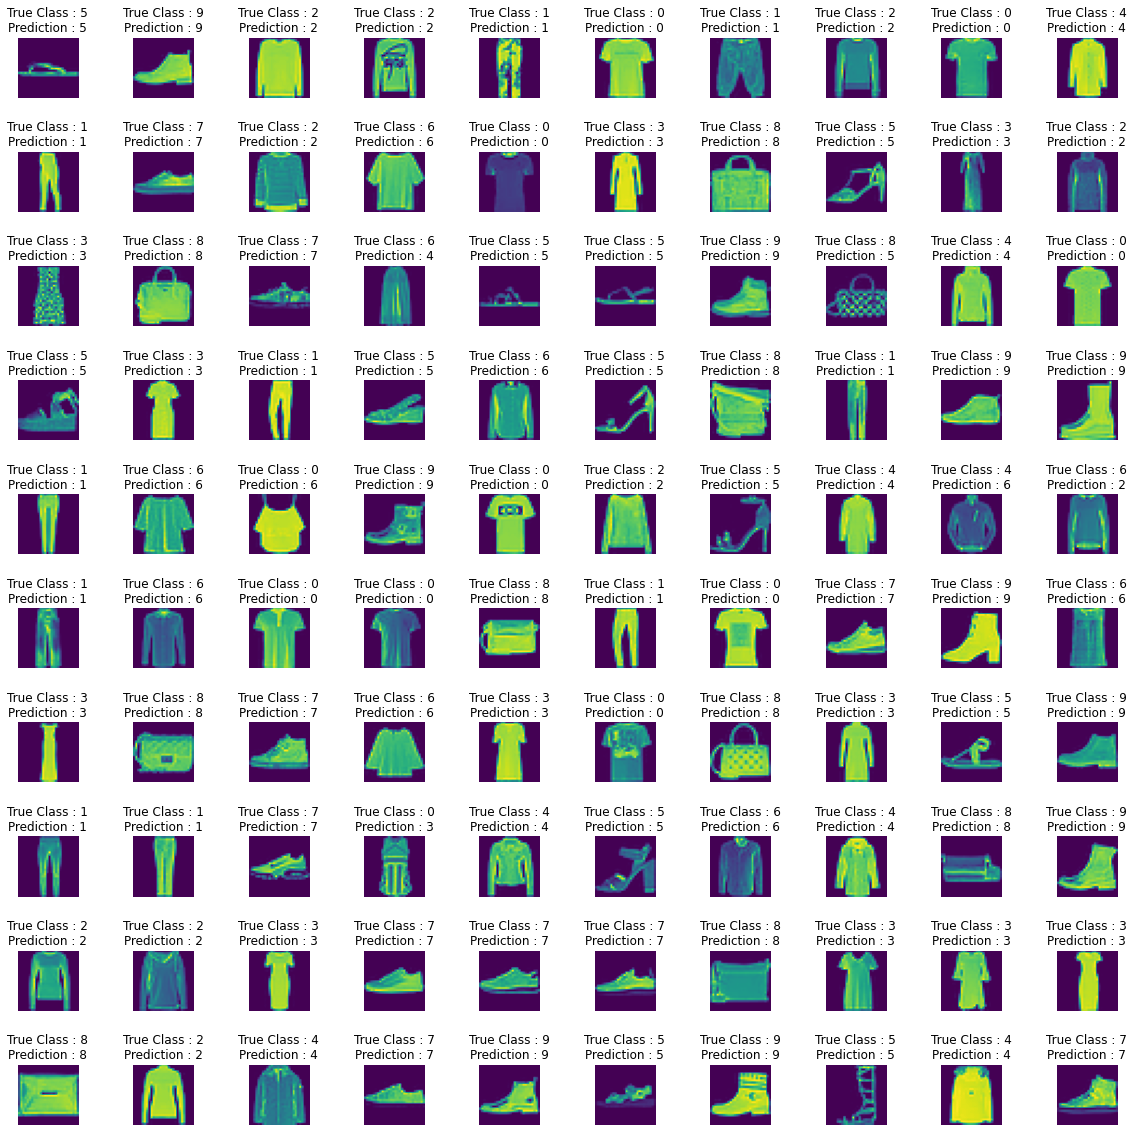

In [31]:
height = 10
width = 10

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(20,20))
axes = axes.ravel()
for i in range(0, height*width):
    index = np.random.randint(len(y_pred))
    axes[i].imshow(X_test[index].reshape((28,28)))
    axes[i].set_title("True Class : {:0.0f}\nPrediction : {:d}".format(y_test[index],y_pred[index]))
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.9, wspace=0.5)

**Plot Confusin Matrix**

<AxesSubplot:>

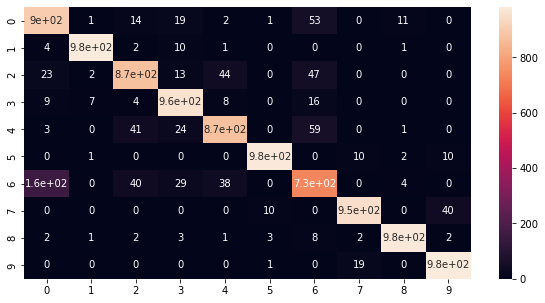

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sbn.heatmap(cm, annot=True)

**Classification Report**

In [33]:
num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, y_pred, target_names=class_names)
print(cr)

              precision    recall  f1-score   support

     class 0       0.82      0.90      0.86      1000
     class 1       0.99      0.98      0.98      1000
     class 2       0.89      0.87      0.88      1000
     class 3       0.91      0.96      0.93      1000
     class 4       0.90      0.87      0.89      1000
     class 5       0.98      0.98      0.98      1000
     class 6       0.80      0.73      0.77      1000
     class 7       0.97      0.95      0.96      1000
     class 8       0.98      0.98      0.98      1000
     class 9       0.95      0.98      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

